<a href="https://colab.research.google.com/github/SandeepH2706/AI-Training-Stellaraa/blob/main/Multipal_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [ ]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dataset.columns
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [ ]:
dependent=dataset[["Profit"]]
dependent.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [ ]:
#spliting the data set into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)


In [ ]:
#traning
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
weight = regressor.coef_
weight

array([[7.90840255e-01, 3.01968165e-02, 3.10148566e-02, 4.63028992e+02,
        3.04799573e+02]])

In [ ]:
bais=regressor.intercept_
bais

array([42403.87087053])

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.9358680970046243

In [ ]:
import pickle
filename="finalized_model_Mul_linear.sav"
pickle.dump(regressor,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open("finalized_model_Mul_linear.sav",'rb'))
result=loaded_model.predict([[23678,32432,42176,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
result

array([[63721.61174472]])

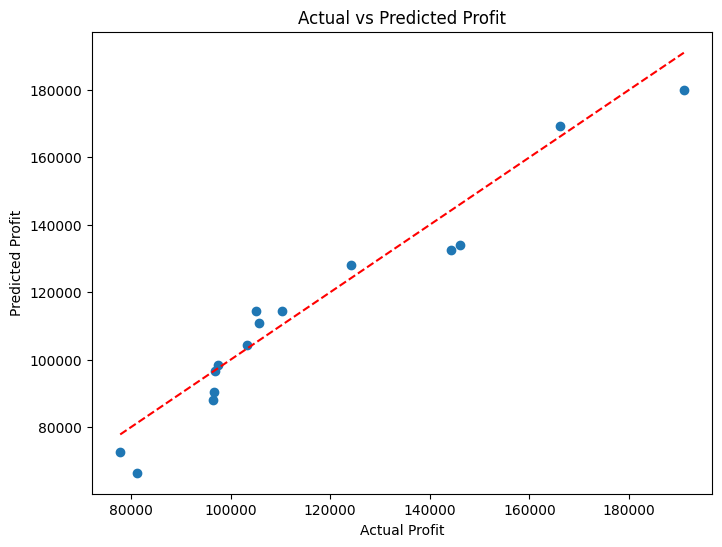

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--') # Add diagonal line
plt.show()

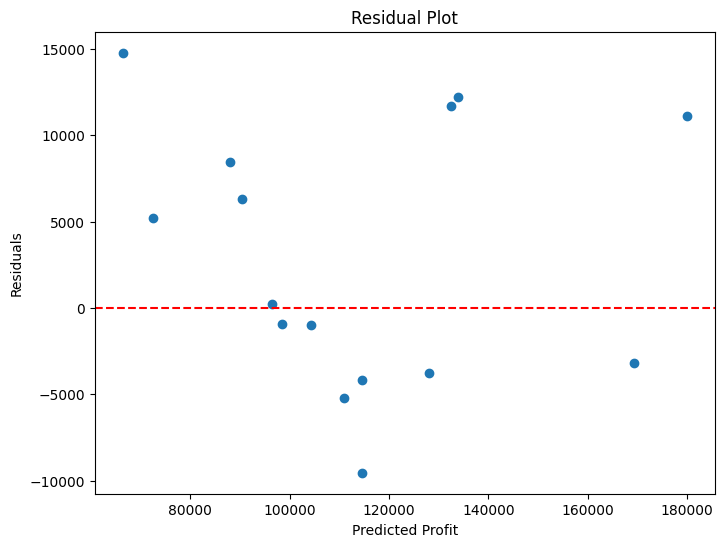

R-squared score: 0.9358680970046243
Prediction: [[63721.61174472]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--') # Add horizontal line at zero
plt.show()
r_score=r2_score(y_test,y_pred)
print(f"R-squared score: {r_score}")


filename="finalized_model_Mul_linear.sav"
pickle.dump(regressor,open(filename,'wb'))
loaded_model=pickle.load(open("finalized_model_Mul_linear.sav",'rb'))
result=loaded_model.predict([[23678,32432,42176,0,1]])
print(f"Prediction: {result}")